In [1]:
import numpy as np
import time
from policydissect.policydissect import do_policy_dissection
from policydissect.metadrive.metadrive_env import SafeMetaDriveEnv
from policydissect.utils.policy import ppo_inference_tf
import os
import pickle


Successfully registered the following environments: ['MetaDrive-validation-v0', 'MetaDrive-10env-v0', 'MetaDrive-100envs-v0', 'MetaDrive-1000envs-v0', 'SafeMetaDrive-validation-v0', 'SafeMetaDrive-10env-v0', 'SafeMetaDrive-100envs-v0', 'SafeMetaDrive-1000envs-v0', 'MARLTollgate-v0', 'MARLBottleneck-v0', 'MARLRoundabout-v0', 'MARLIntersection-v0', 'MARLParkingLot-v0', 'MARLMetaDrive-v0'].


In [2]:
from metadrive.examples.ppo_expert.numpy_expert import ckpt_path
import random

In [3]:

seed = 0
random.seed(seed)
np.random.seed(seed)

policy_func = ppo_inference_tf
seed_num = 1
max_step = 1500

env = SafeMetaDriveEnv(
    dict(
        use_render=False,
        accident_prob=0.,
        traffic_density=0.,
        random_spawn_lane_index=False,
        map="COCX",
        environment_num=1,
        start_seed=30,
        vehicle_config=dict(
            lidar=dict(num_lasers=240, distance=50, num_others=4, gaussian_noise=0.0, dropout_prob=0.0)
        ),
    )
)


===== Do Policy Dissection =====
Finish seed: 0, reward: 707.1838516505046, Success: True
===== Dissect episode 0 =====
============ process obs dim: 0 ============
============ process obs dim: 1 ============
============ process obs dim: 2 ============
============ process obs dim: 3 ============
============ process obs dim: 4 ============
============ process obs dim: 5 ============
============ process obs dim: 6 ============
============ process obs dim: 7 ============
============ process obs dim: 8 ============
============ process obs dim: 9 ============
============ process obs dim: 10 ============
============ process obs dim: 11 ============
============ process obs dim: 12 ============
============ process obs dim: 13 ============
============ process obs dim: 14 ============
============ process obs dim: 15 ============
============ process obs dim: 16 ============
============ process obs dim: 17 ============
============ process obs dim: 18 ============
============ pro

============ process obs dim: 184 ============
============ process obs dim: 185 ============
============ process obs dim: 186 ============
============ process obs dim: 187 ============
============ process obs dim: 188 ============
============ process obs dim: 189 ============
============ process obs dim: 190 ============
============ process obs dim: 191 ============
============ process obs dim: 192 ============
============ process obs dim: 193 ============
============ process obs dim: 194 ============
============ process obs dim: 195 ============
============ process obs dim: 196 ============
============ process obs dim: 197 ============
============ process obs dim: 198 ============
============ process obs dim: 199 ============
============ process obs dim: 200 ============
============ process obs dim: 201 ============
============ process obs dim: 202 ============
============ process obs dim: 203 ============
============ process obs dim: 204 ============
============ 

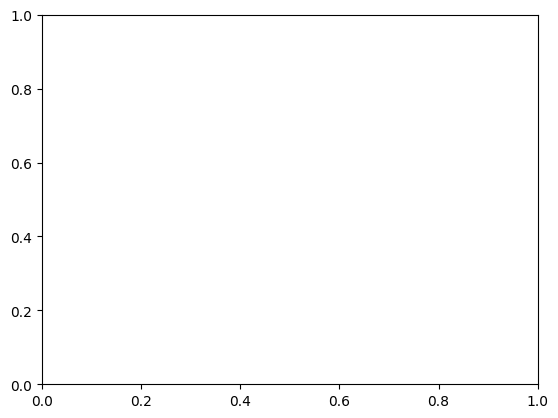

In [4]:

print("===== Do Policy Dissection =====")
path = ckpt_path
weights = np.load(ckpt_path)
collected_episodes = []
for seed in range(seed_num):
    o = env.reset()
    episode_activation_values = []
    episode_observations = [o]
    current_step = 0
    total_r = 0

    while True:
        action, activation = policy_func(weights, o, hidden_layer_num=2, conditional_control_map={}, command="")
        o, r, d, i = env.step(action)
        episode_activation_values.append(activation)
        current_step += 1
        total_r += r
        if d or current_step > max_step:
            collected_episodes.append(
                dict(neuron_activation=episode_activation_values, observations=episode_observations)
            )
            print("Finish seed: {}, reward: {}, Success: {}".format(seed, total_r, i["arrive_dest"]))
            break
        episode_observations.append(o)
env.close()
pd_ret = do_policy_dissection(collected_episodes)


In [5]:
import pickle

with open("pzh data.pkl", "wb") as f:
    pickle.dump(collected_episodes, f)

In [3]:
import pickle

with open("pzh data.pkl", "rb") as f:
    collected_episodes = pickle.load(f)

In [10]:
len(collected_episodes)

1

In [9]:
type(collected_episodes[0])

dict

In [12]:
data = collected_episodes[0]

In [19]:
len(data["neuron_activation"])

693

In [20]:
current_step

693

In [25]:
data["neuron_activation"][0][0]["after_tanh"].shape
#                 time step><layer

(1, 256)

In [30]:
data["neuron_activation"][0][0]["after_tanh"].shape

(1, 256)

In [33]:
# (1, 256) Activation @ Layer = data['neuron_activation'][TIME][LAYER]['after_tanh', 'before_tanh']
# (275, ) Observation = data['observations'][TIME]

In [32]:
data['observations'][0].shape

(275,)

In [34]:
from policydissect.policydissect import *

===== Dissect episode 0 =====
============ process obs dim: 0 ============
============ process obs dim: 1 ============
============ process obs dim: 2 ============
============ process obs dim: 3 ============
============ process obs dim: 4 ============
============ process obs dim: 5 ============
============ process obs dim: 6 ============
============ process obs dim: 7 ============
============ process obs dim: 8 ============
============ process obs dim: 9 ============
============ process obs dim: 10 ============
============ process obs dim: 11 ============
============ process obs dim: 12 ============
============ process obs dim: 13 ============
============ process obs dim: 14 ============
============ process obs dim: 15 ============
============ process obs dim: 16 ============
============ process obs dim: 17 ============
============ process obs dim: 18 ============
============ process obs dim: 19 ============
============ process obs dim: 20 ============
============ p

============ process obs dim: 184 ============
============ process obs dim: 185 ============
============ process obs dim: 186 ============
============ process obs dim: 187 ============
============ process obs dim: 188 ============
============ process obs dim: 189 ============
============ process obs dim: 190 ============
============ process obs dim: 191 ============
============ process obs dim: 192 ============
============ process obs dim: 193 ============
============ process obs dim: 194 ============
============ process obs dim: 195 ============
============ process obs dim: 196 ============
============ process obs dim: 197 ============
============ process obs dim: 198 ============
============ process obs dim: 199 ============
============ process obs dim: 200 ============
============ process obs dim: 201 ============
============ process obs dim: 202 ============
============ process obs dim: 203 ============
============ process obs dim: 204 ============
============ 

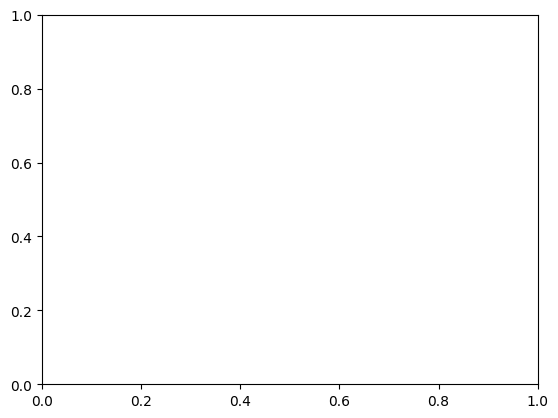

In [36]:
    
specific_neuron=None
    
specific_obs=None


n_fft = 32
# assert not os.path.exists("dissection"), "please save previous result"
# os.makedirs("dissection")
ckpt_ret = {}
for k, epi_data in enumerate(collected_episodes):
    print("===== Dissect episode {} =====".format(k))
    epi_activation = epi_data["neuron_activation"]
    observations = epi_data["observations"]

    neurons_fft, origin_neuron = analyze_neuron(epi_activation, n_fft=n_fft, specific_neuron=specific_neuron)

    obs_fft, origin_obs = analyze_observation(observations, n_fft=n_fft, specific_obs=specific_obs)

    ret_obs = get_most_relevant_neuron(
        target_dim_name="obs", neurons_activation_fft=neurons_fft, epi_target_dims_fft=obs_fft
    )["obs_analysis"]

    
    this_epi_frequency_error = ret_obs
    this_epi_frequency_error["seed"] = k
    ckpt_ret[k] = this_epi_frequency_error

"""
ret_obs = Dict[STATE DIM][512] = {
    "neuron": {"layer": X, "neuron_index": X}, 
    "error": {"freq_diff": XXX, "correlation": XXX}
}
"""

In [43]:
ret_obs[0]

[{'neuron': {'layer': 0, 'neuron_index': 107},
  'error': {'freq_diff': 5.490978, 'correlation': -1.0000000556550703}},
 {'neuron': {'layer': 0, 'neuron_index': 212},
  'error': {'freq_diff': 5.6722302, 'correlation': 1.0}},
 {'neuron': {'layer': 0, 'neuron_index': 98},
  'error': {'freq_diff': 5.946813, 'correlation': 1.0}},
 {'neuron': {'layer': 0, 'neuron_index': 165},
  'error': {'freq_diff': 6.0441694, 'correlation': 1.0}},
 {'neuron': {'layer': 0, 'neuron_index': 123},
  'error': {'freq_diff': 6.3130126, 'correlation': -1.0000000556550703}},
 {'neuron': {'layer': 1, 'neuron_index': 191},
  'error': {'freq_diff': 6.8515306, 'correlation': 1.0}},
 {'neuron': {'layer': 0, 'neuron_index': 48},
  'error': {'freq_diff': 6.913584, 'correlation': -1.0000000556550703}},
 {'neuron': {'layer': 0, 'neuron_index': 175},
  'error': {'freq_diff': 7.248357, 'correlation': 1.0}},
 {'neuron': {'layer': 1, 'neuron_index': 217},
  'error': {'freq_diff': 7.3125224, 'correlation': 0.9310344842742019}}

In [5]:
data = collected_episodes[0]
tmp = [data["neuron_activation"][i][0]["after_tanh"] for i in range(600)]

In [6]:
tmp = np.array(tmp)

In [7]:
tmp = tmp.reshape(600, 256)

In [8]:
tmp = tmp.swapaxes(0, 1)

In [9]:
tmp.shape

(256, 600)

In [57]:
np.linalg.inv(Stilde).shape

(10, 10)

In [58]:
Utilde.T.shape

(10, 256)

In [59]:
Xprime.shape

(256, 599)

In [60]:
Vtilde.shape

(256, 10)

In [63]:
V.shape

(256, 600)

In [34]:
tmp.shape

(256, 600)

In [37]:
plt.pcolor?

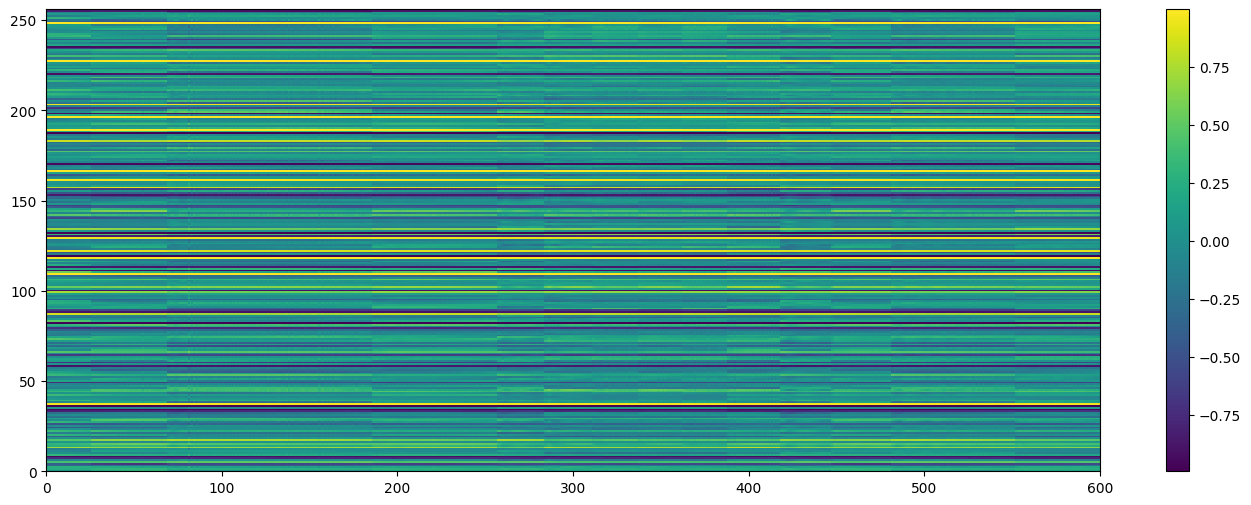

In [134]:
x = np.arange(0, 256)
t = np.arange(0, 600)

xgrid, tgrid = np.meshgrid(x, t)

In [135]:
from pydmd import DMD


In [148]:
dmd = DMD(svd_rank=5)


In [149]:
tmp.shape

(256, 600)

In [150]:
dmd.fit(tmp)

Eigenvalue (0.9999819993972778+0j): distance from unit circle 3.6000881422637576e-05
Eigenvalue (0.9657764434814453+0.007025451399385929j): distance from unit circle 0.06722650424896548
Eigenvalue (0.9657764434814453-0.007025451399385929j): distance from unit circle 0.06722650424896548
Eigenvalue (0.9816591143608093+0j): distance from unit circle 0.03634538319235148
Eigenvalue (0.9764522910118103+0j): distance from unit circle 0.046540923377786925


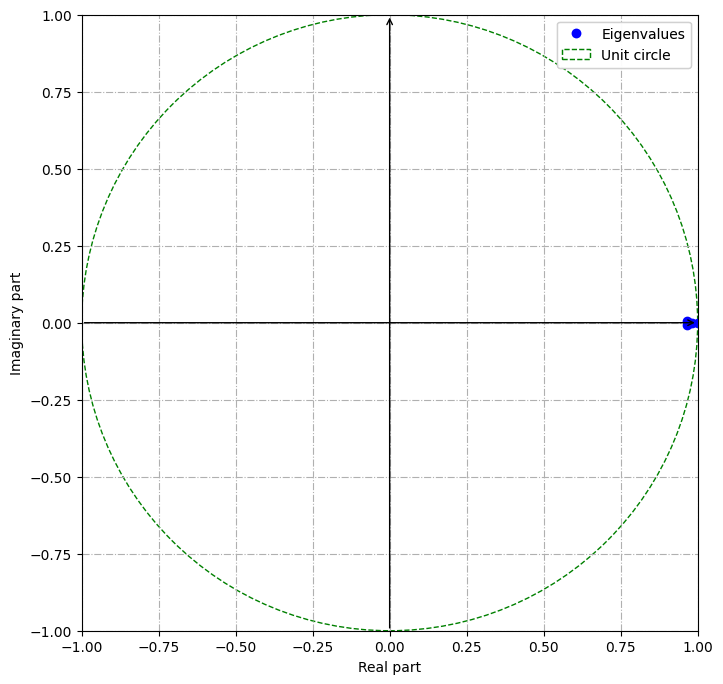

In [151]:
for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

In [152]:
import matplotlib.pyplot as plt
import numpy as np


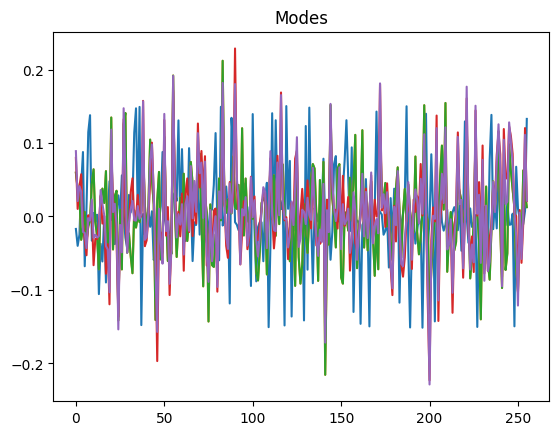

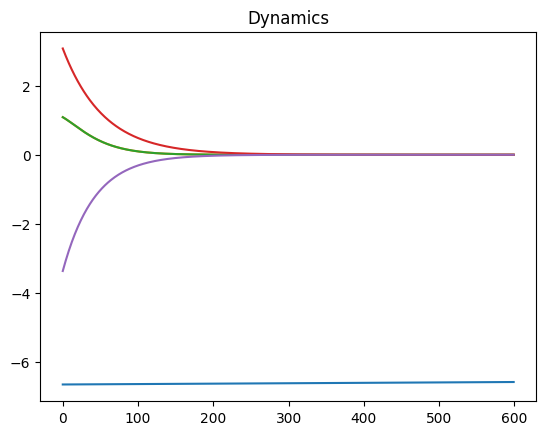

In [153]:
for mode in dmd.modes.T:
    plt.plot(np.arange(0, 256), mode.real)
    plt.title('Modes')
plt.show()

for dynamic in dmd.dynamics:
    plt.plot(np.arange(0, 600), dynamic.real)
    plt.title('Dynamics')
plt.show()

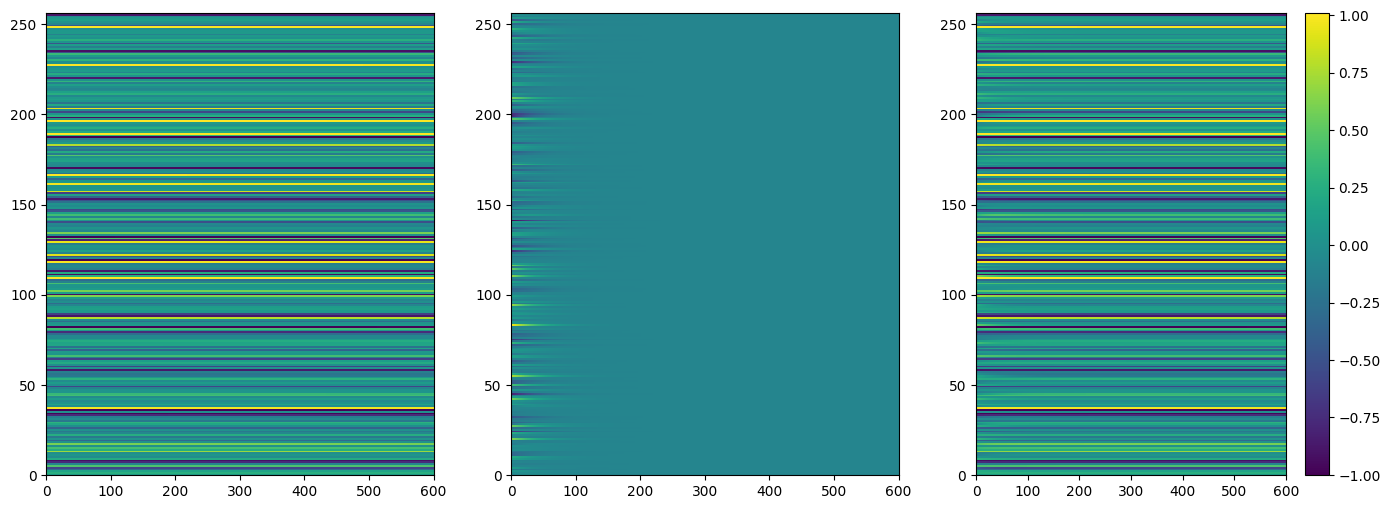

In [154]:
fig = plt.figure(figsize=(17,6))

plt.subplot(131)

mode = dmd.modes.T[0]
dynamic = dmd.dynamics[0]
plt.pcolor(mode.reshape(-1, 1).dot(dynamic.reshape(1, -1)).real)



plt.subplot(132)

mode = dmd.modes.T[1]
dynamic = dmd.dynamics[1]
plt.pcolor(mode.reshape(-1, 1).dot(dynamic.reshape(1, -1)).real)

    
plt.subplot(133)
plt.pcolor(dmd.reconstructed_data.T.real.T)
plt.colorbar()

# plt.show()

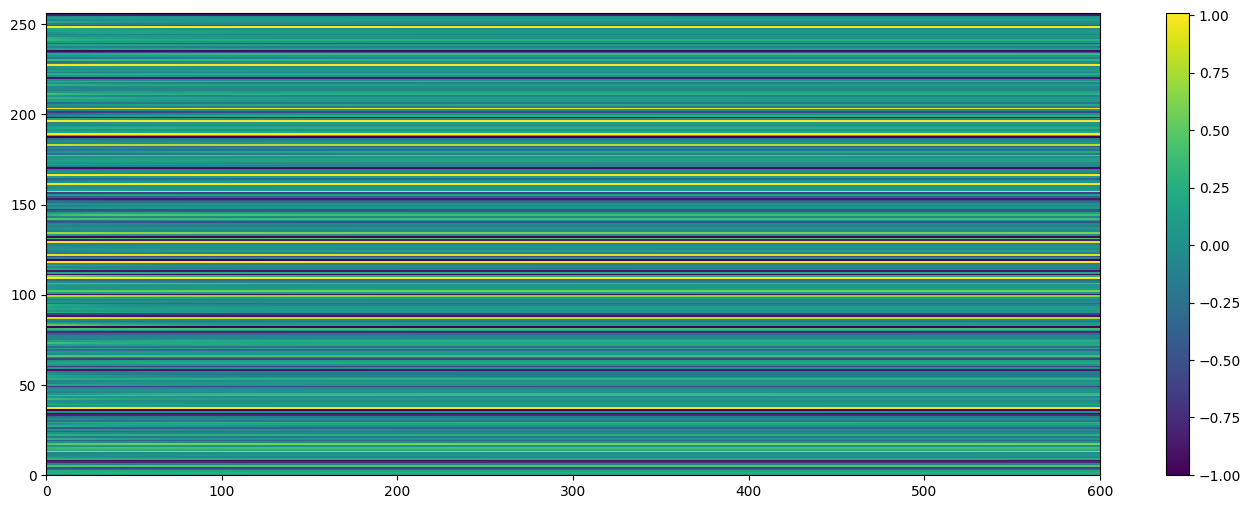

In [155]:
fig = plt.figure(figsize=(17,6))
plt.pcolor(dmd.reconstructed_data.T.real.T)
plt.colorbar()

In [156]:
dmd.reconstructed_data.shape

(256, 600)

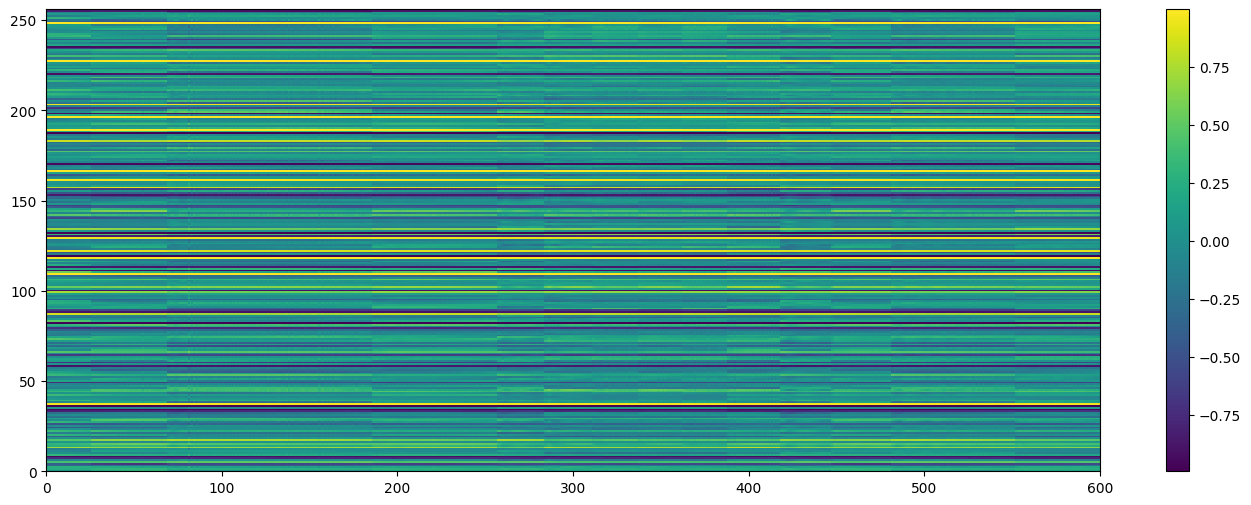

In [157]:
fig = plt.figure(figsize=(17,6))
plt.pcolor(tmp)
plt.colorbar()

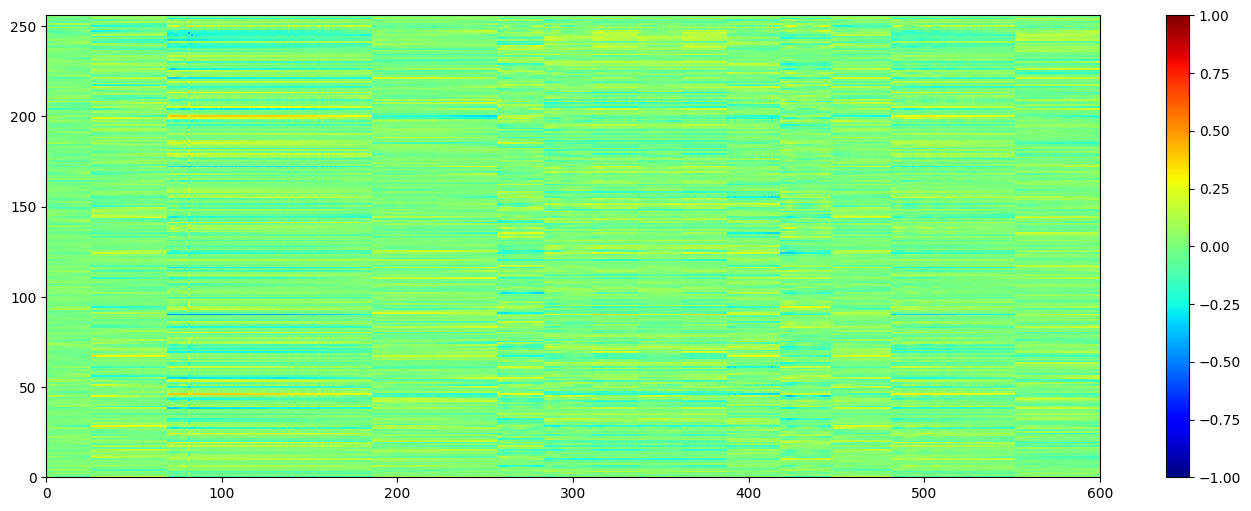

In [169]:
fig = plt.figure(figsize=(17,6))
plt.pcolor((tmp.T-dmd.reconstructed_data.T).real.T, cmap="jet", vmax=1, vmin=-1)
fig = plt.colorbar()

In [159]:
from pydmd import MrDMD

In [162]:
mrdmd = MrDMD(DMD(svd_rank=-1), max_level=7, max_cycles=1)

In [172]:
mrdmd.fit(X=tmp)

C:\Users\peng_\.conda\envs\pd\lib\site-packages\pydmd\mrdmd.py:499: ComplexWarning: Casting complex values to real discards the imaginary part
  ).astype(X.dtype)
C:\Users\peng_\.conda\envs\pd\lib\site-packages\pydmd\dmdbase.py:719: UserWarning: Input data matrix X has condition number 165712944.0. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  cond_number
C:\Users\peng_\.conda\envs\pd\lib\site-packages\pydmd\dmdbase.py:719: UserWarning: Input data matrix X has condition number 147348112.0. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  cond_number
C:\Users\peng_\.conda\envs\pd\lib\site-packages\pydmd\dmdbase.py:719: UserWarning: Input data matrix X has condition number 52883744.0. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  cond_number
C:\Users\peng_\.conda\envs\pd\lib\site-packages\pydmd\dmdbase.py:719: UserWarning: Input data matrix X has conditio

C:\Users\peng_\.conda\envs\pd\lib\site-packages\pydmd\dmdbase.py:719: UserWarning: Input data matrix X has condition number 562923.125. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  cond_number
C:\Users\peng_\.conda\envs\pd\lib\site-packages\pydmd\dmdbase.py:719: UserWarning: Input data matrix X has condition number 8545890.0. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  cond_number


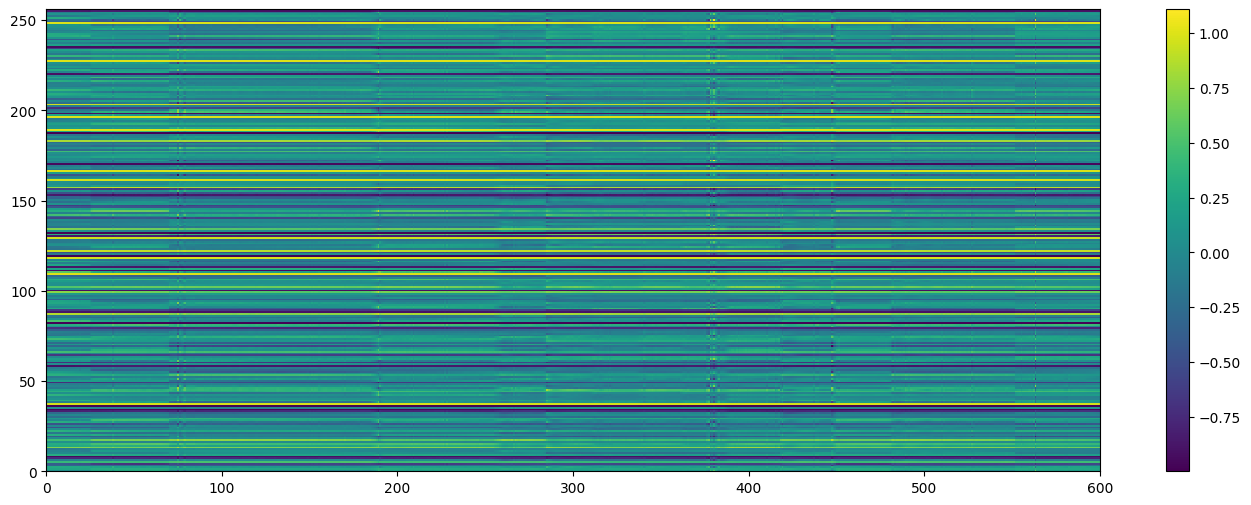

In [173]:
fig = plt.figure(figsize=(17,6))
plt.pcolor(mrdmd.reconstructed_data.T.real.T)
plt.colorbar()

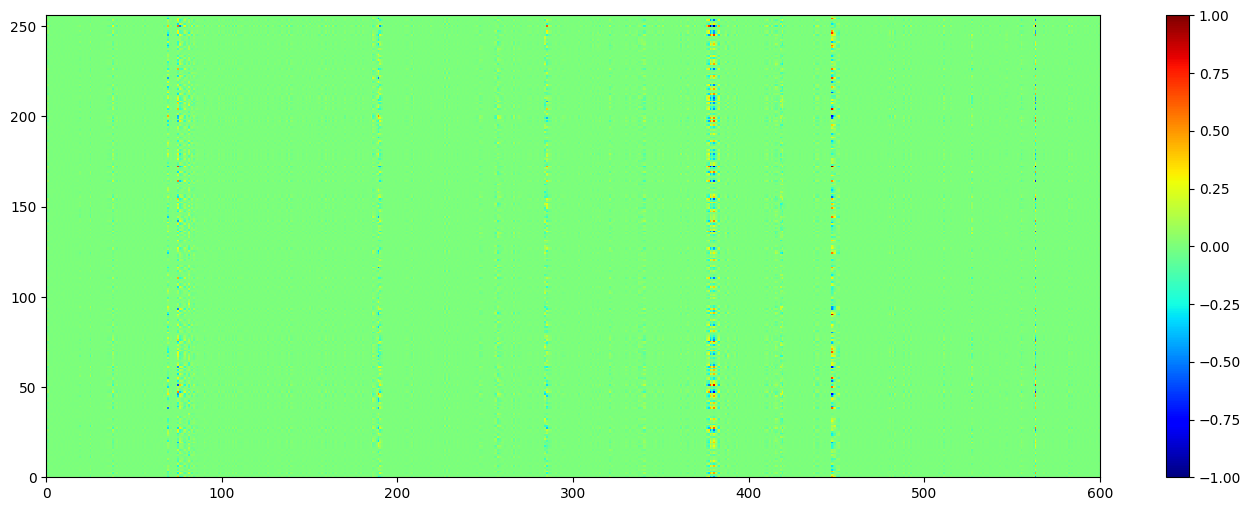

In [174]:
fig = plt.figure(figsize=(17,6))
plt.pcolor((tmp.T-mrdmd.reconstructed_data.T).real.T, cmap="jet", vmax=1, vmin=-1)
fig = plt.colorbar()

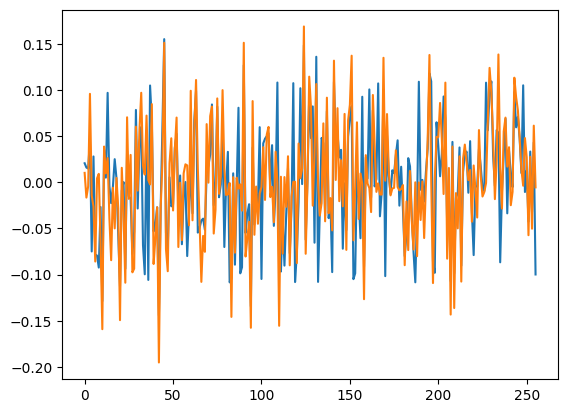

In [175]:
pmodes = mrdmd.partial_modes(level=0)
fig = plt.plot(x, pmodes.real)

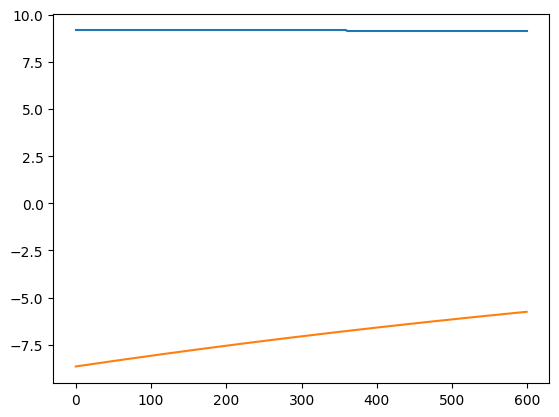

In [176]:
pdyna = mrdmd.partial_dynamics(level=0)
fig = plt.plot(t, pdyna.real.T)

The number of modes in the level number 1 is 5


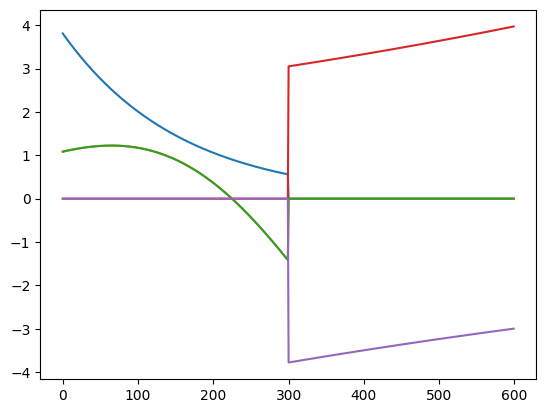

In [181]:
lv = 1

pdyna = mrdmd.partial_dynamics(level=lv)
print('The number of modes in the level number {} is {}'.format(lv, pdyna.shape[0]))
fig = plt.plot(t, pdyna.real.T)

In [183]:
def make_plot(X, x=None, y=None, figsize=(12, 8), title=''):
    """
    Plot of the data X
    """
    plt.figure(figsize=figsize)
    plt.title(title)
    X = np.real(X)
    CS = plt.pcolor(x, y, X)
    cbar = plt.colorbar(CS)
    plt.xlabel('Space')
    plt.ylabel('Time')
    plt.show()

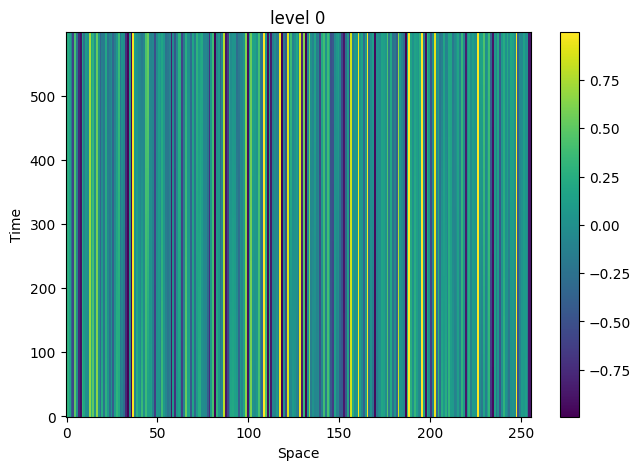

In [184]:
pdata = mrdmd.partial_reconstructed_data(level=0)
make_plot(pdata.T, x=x, y=t, title='level 0', figsize=(7.5, 5))

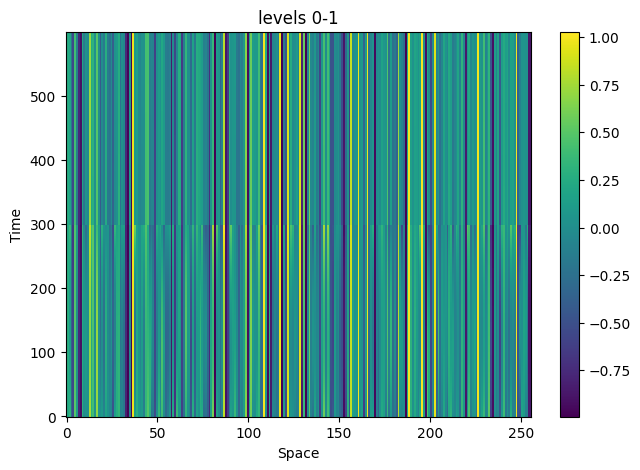

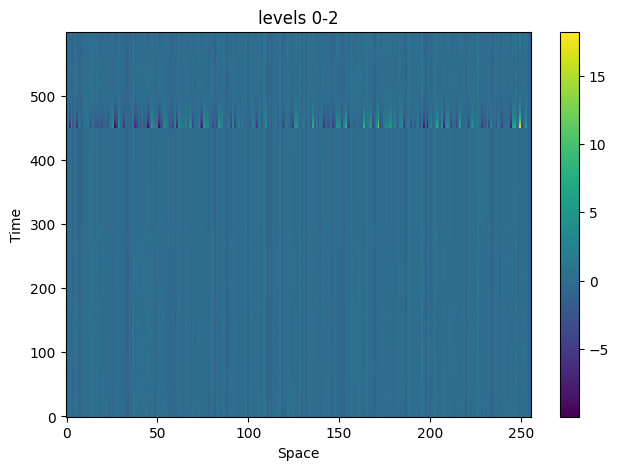

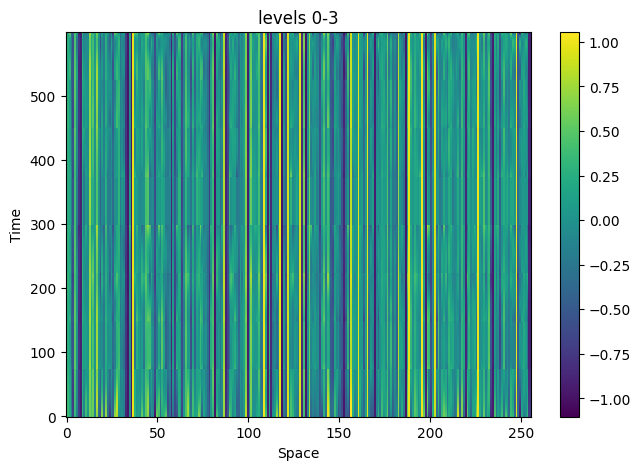

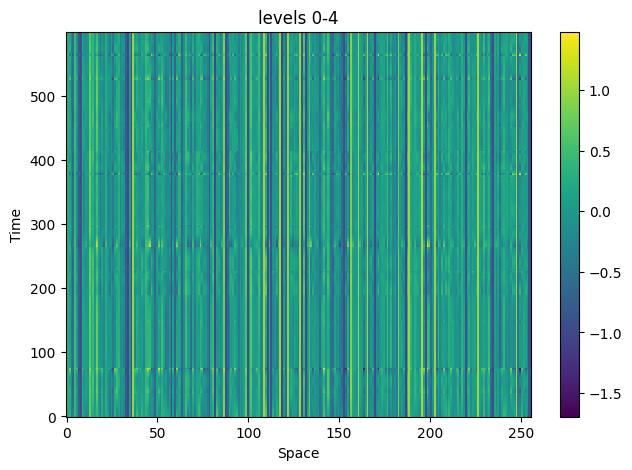

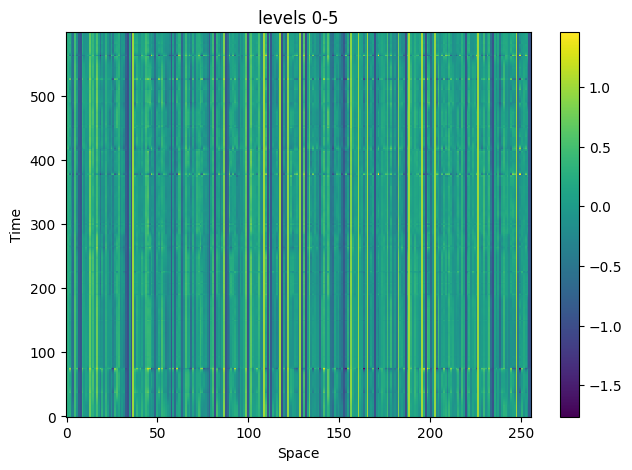

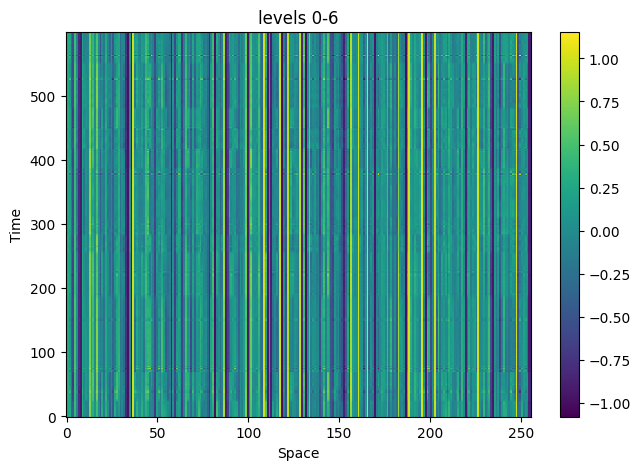

In [185]:
for i in range(1, 7):
    pdata += mrdmd.partial_reconstructed_data(level=i)
    make_plot(pdata.T, x=x, y=t, title='levels 0-' + str(i), figsize=(7.5, 5))

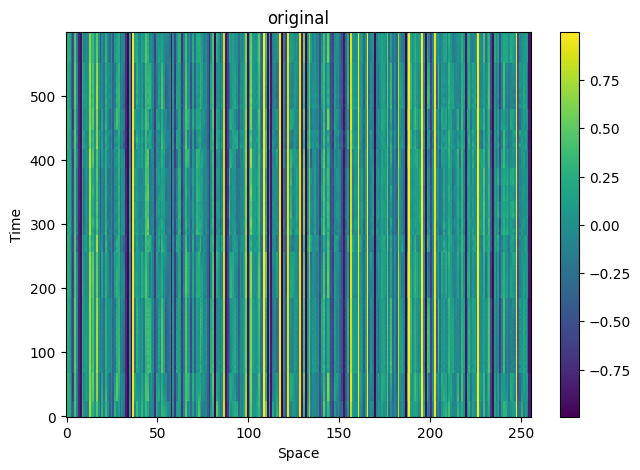

In [187]:
make_plot(tmp.T, x=x, y=t, title="original", figsize=(7.5, 5))

The number of eigenvalues is 478


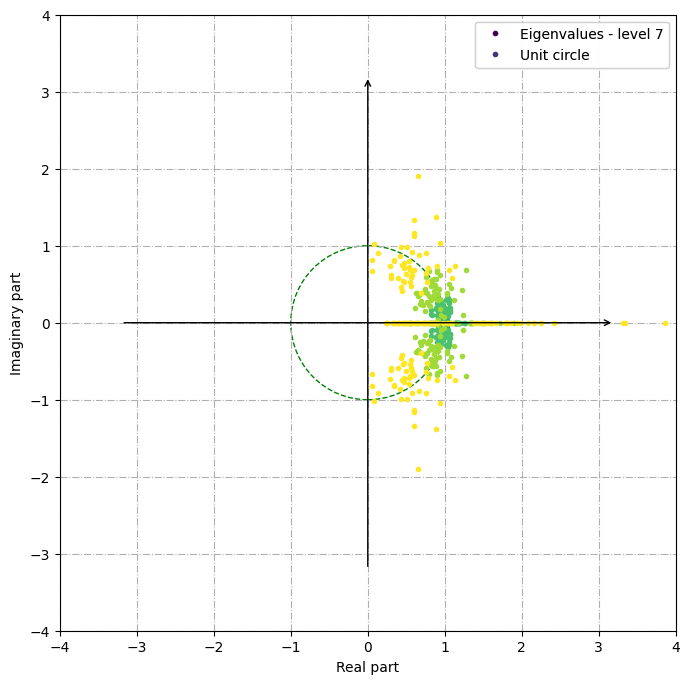

In [188]:
print('The number of eigenvalues is {}'.format(mrdmd.eigs.shape[0]))
mrdmd.plot_eigs(show_axes=True, show_unit_circle=True, figsize=(8, 8))

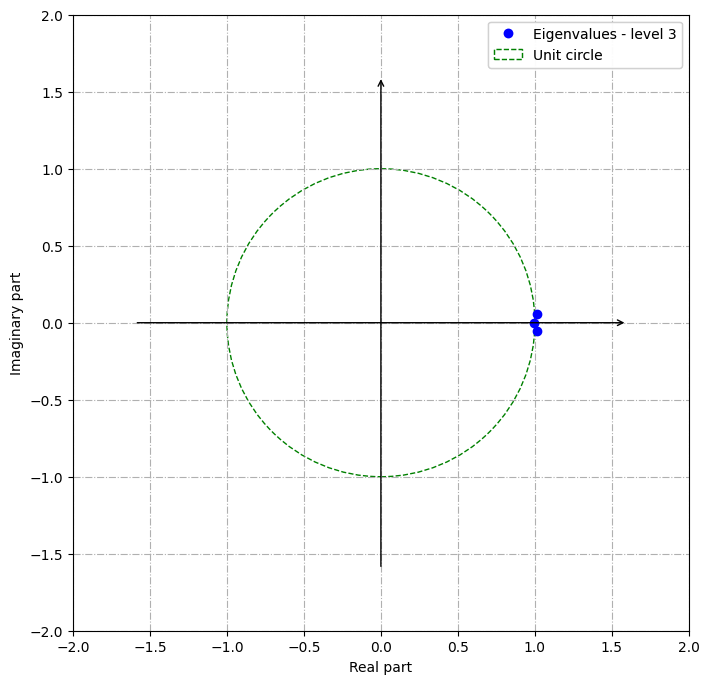

In [192]:
mrdmd.plot_eigs(show_axes=True, show_unit_circle=True, figsize=(8, 8), level=3, node=0)